In [25]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [26]:
!pip install astroNN

In [27]:
from astroNN.datasets import load_galaxy10

In [28]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

C:\Users\SHIVAM CHAUDHARY\.astroNN\datasets\Galaxy10.h5 was found!
[2 2 4 ... 2 9 2]


In [29]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [30]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [31]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [32]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [33]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

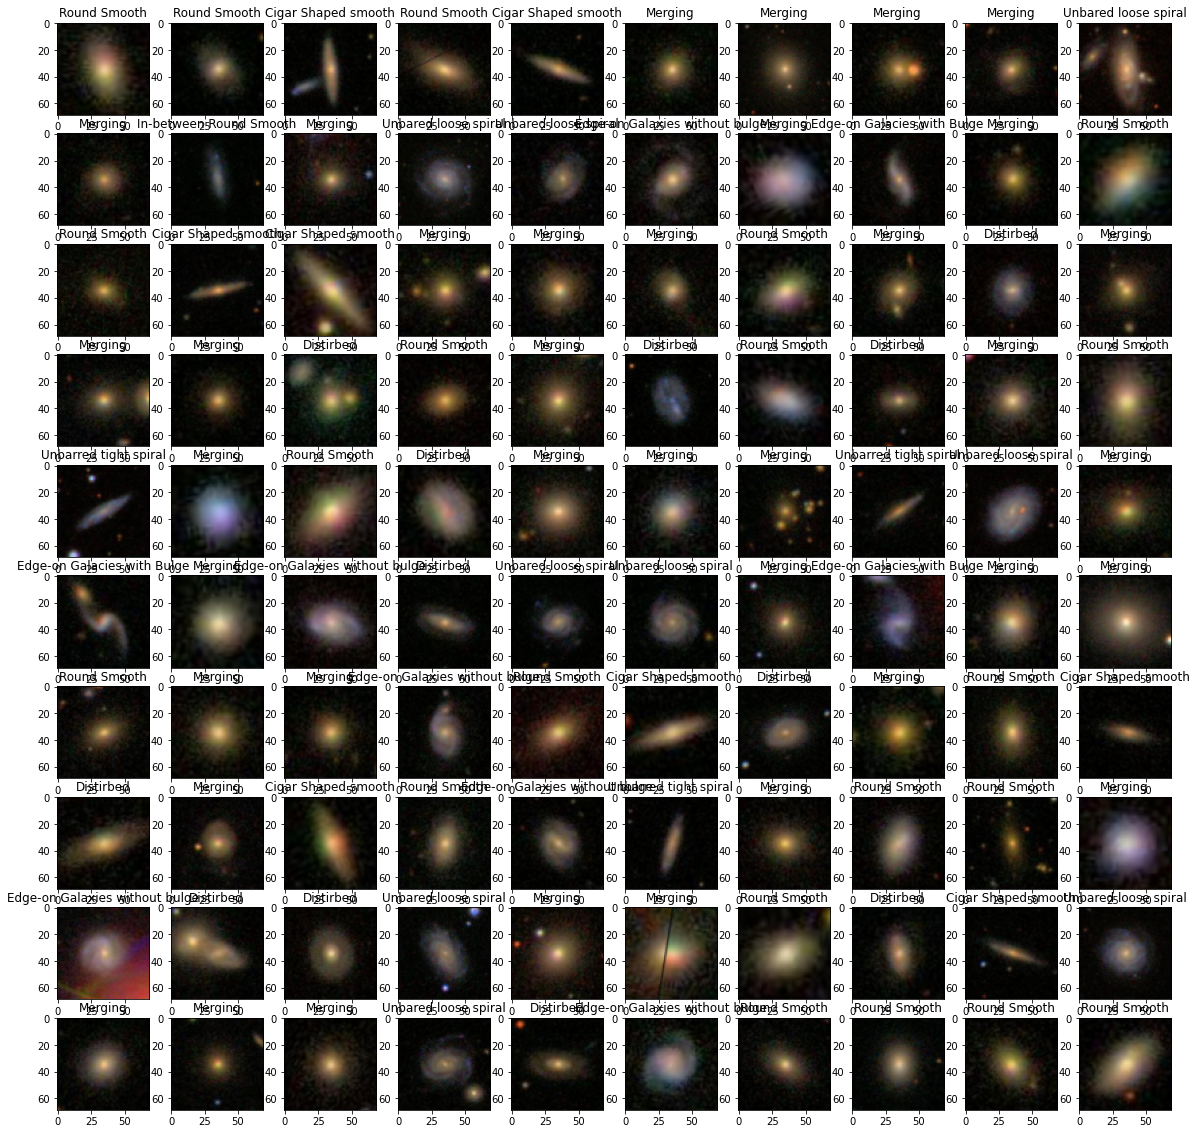

In [34]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(True)
    axes[i,j].get_yaxis().set_visible(True)
    index +=1
plt.show()


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


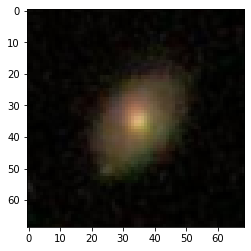

In [12]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [13]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

# Value normalization
X_train  = X_train/255
X_test  = X_test/255


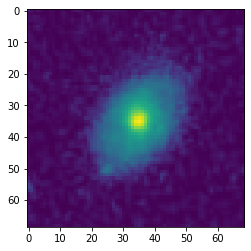

In [14]:
plt.imshow(X_train[0])

In [15]:
# Defining input shape for CNN
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [16]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [17]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 32)        9

In [19]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
batch_size=64
history = model.fit(X_train, train_labels, 
                    epochs=100, 
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/100
307/307 [==============================] - 48s 155ms/step - loss: 1.6108 - acc: 0.3735 - val_loss: 1.2726 - val_acc: 0.5287
Epoch 2/100
307/307 [==============================] - 55s 178ms/step - loss: 1.2747 - acc: 0.5133 - val_loss: 1.1374 - val_acc: 0.5668
Epoch 3/100
307/307 [==============================] - 53s 174ms/step - loss: 1.1308 - acc: 0.5819 - val_loss: 0.9428 - val_acc: 0.6540
Epoch 4/100
307/307 [==============================] - 52s 171ms/step - loss: 1.0118 - acc: 0.6307 - val_loss: 0.8643 - val_acc: 0.6673
Epoch 5/100
307/307 [==============================] - 49s 160ms/step - loss: 0.9485 - acc: 0.6600 - val_loss: 0.8074 - val_acc: 0.6866
Epoch 6/100
307/307 [==============================] - 53s 172ms/step - loss: 0.8909 - acc: 0.6728 - val_loss: 0.7760 - val_acc: 0.7164
Epoch 7/100
307/307 [==============================] - 50s 161ms/step - loss: 0.8695 - acc: 0.6858 - val_loss: 0.7527 - val_acc: 0.7219
Epoch 8/100
307/307 [===========================

Epoch 61/100
307/307 [==============================] - 45s 148ms/step - loss: 0.5295 - acc: 0.8172 - val_loss: 0.7063 - val_acc: 0.7664
Epoch 62/100
307/307 [==============================] - 45s 148ms/step - loss: 0.5634 - acc: 0.8025 - val_loss: 0.6585 - val_acc: 0.7751
Epoch 63/100
307/307 [==============================] - 46s 150ms/step - loss: 0.5123 - acc: 0.8202 - val_loss: 0.6549 - val_acc: 0.7765
Epoch 64/100
307/307 [==============================] - 44s 145ms/step - loss: 0.5351 - acc: 0.8188 - val_loss: 0.7255 - val_acc: 0.7650
Epoch 65/100
307/307 [==============================] - 45s 146ms/step - loss: 0.5224 - acc: 0.8193 - val_loss: 0.6794 - val_acc: 0.7710
Epoch 66/100
307/307 [==============================] - 45s 147ms/step - loss: 0.5506 - acc: 0.8127 - val_loss: 0.6625 - val_acc: 0.7673
Epoch 67/100
307/307 [==============================] - 45s 147ms/step - loss: 0.5175 - acc: 0.8209 - val_loss: 0.7277 - val_acc: 0.7724
Epoch 68/100
307/307 [===================

In [24]:
score = model.evaluate(X_test, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7231972217559814
Test accuracy: 0.7613584399223328


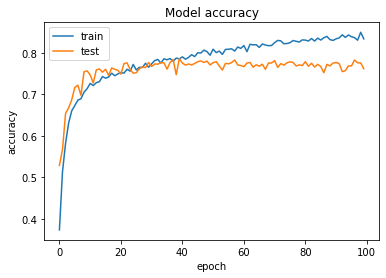

In [20]:
%matplotlib inline
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

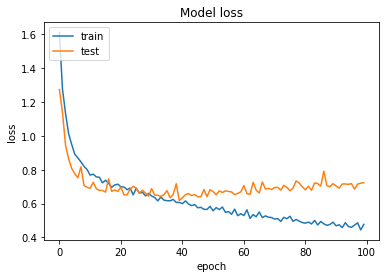

In [21]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')

[[148  16  37   2   5   0   1  13  21  14]
 [ 47 616  50   0   0   0   0   2   2   0]
 [ 64  22 527   6  11   0   0   1   1   3]
 [  0   0   0  17   5   0   0   0   0   0]
 [  6   0   1  12 135   1   6   1   0   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   9  14   0  52   0   0   1]
 [ 32   2   5   0   0   0   0  95  32   1]
 [ 28   0   1   0   0   0   0   9  48   7]
 [ 20   0   0   0   0   0   0   1   7  21]]


NameError: name 'itertools' is not defined

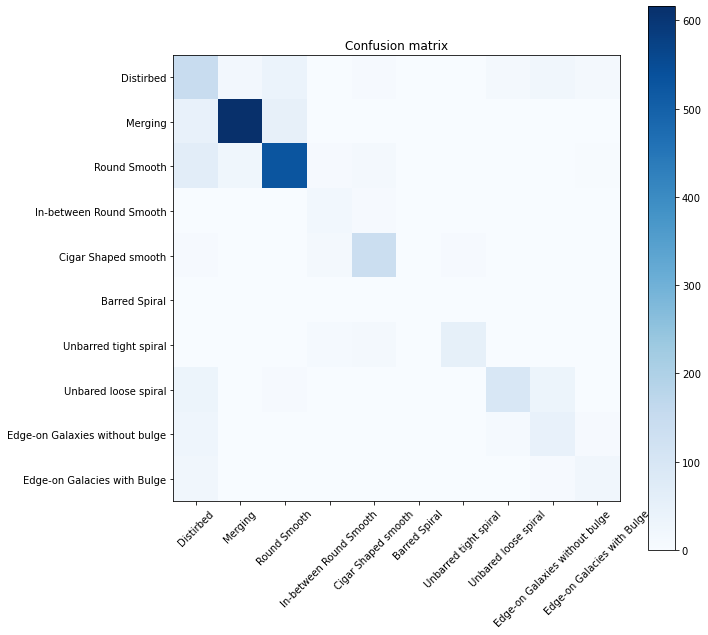

In [22]:
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = model.predict(X_test)

pred_label = np.argmax(pred, axis=1)
actual_label = np.argmax(test_labels, axis=1)

cm = confusion_matrix(pred_label+1, actual_label+1)
print (cm)
plot_confusionM(cm, imageLabel)

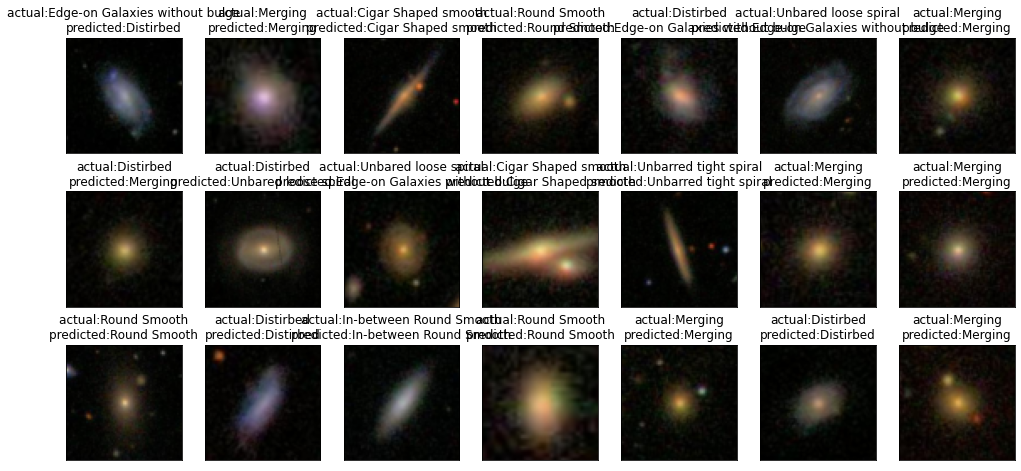

In [23]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n' 
                            + 'predicted:' + imageLabel[pred_label[index]])
        axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()